# PyTorch Tutorial for Beginners

Welcome to this comprehensive PyTorch tutorial! This notebook is designed for students who are new to PyTorch and deep learning.

## What is PyTorch?

PyTorch is an open-source machine learning framework developed by Meta (formerly Facebook). It's widely used for:
- Deep learning research and development
- Computer vision tasks
- Natural language processing
- Scientific computing with GPU acceleration

## Why PyTorch?

- **Dynamic computation graphs**: Build models on-the-fly
- **Pythonic**: Feels natural to Python developers
- **Strong community**: Excellent documentation and support
- **Research-friendly**: Easy to experiment and prototype

Let's get started!

## 1. Setup and Installation Check

First, let's make sure PyTorch is installed and check our environment.

In [240]:
# Install PyTorch if not already installed
# Uncomment the line below if you need to install PyTorch
# !pip install torch torchvision torchaudio

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

print(f"PyTorch version: {torch.__version__}")
print(f"Python version: {torch.version.cuda if torch.cuda.is_available() else 'CUDA not available'}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA version: {torch.version.cuda}")
    print(f"GPU device: {torch.cuda.get_device_name(0)}")

PyTorch version: 2.9.0
Python version: CUDA not available
CUDA available: False


## 2. Understanding Tensors

Tensors are the fundamental data structure in PyTorch. They're similar to NumPy arrays but can run on GPUs and support automatic differentiation.

### 2.1 Creating Tensors

In [241]:
# Creating tensors from Python lists
data = [[1, 2], [3, 4]]
tensor_from_list = torch.tensor(data)
print("From list:")
print(tensor_from_list)
print(f"Shape: {tensor_from_list.shape}")
print(f"Data type: {tensor_from_list.dtype}")
print()

From list:
tensor([[1, 2],
        [3, 4]])
Shape: torch.Size([2, 2])
Data type: torch.int64



In [242]:
# Creating tensors with specific shapes
zeros = torch.zeros(2, 3)  # 2x3 matrix of zeros
ones = torch.ones(2, 3)    # 2x3 matrix of ones
random = torch.randn(2, 3) # 2x3 matrix with random values from standard normal distribution

print("Zeros tensor:")
print(zeros)
print("\nOnes tensor:")
print(ones)
print("\nRandom tensor:")
print(random)

Zeros tensor:
tensor([[0., 0., 0.],
        [0., 0., 0.]])

Ones tensor:
tensor([[1., 1., 1.],
        [1., 1., 1.]])

Random tensor:
tensor([[ 0.1623, -0.5497,  2.2073],
        [ 1.9239, -0.6650, -0.1145]])


In [243]:
# Creating tensors from NumPy arrays
numpy_array = np.array([[1, 2, 3], [4, 5, 6]])
tensor_from_numpy = torch.from_numpy(numpy_array)

print("NumPy array:")
print(numpy_array)
print("\nTensor from NumPy:")
print(tensor_from_numpy)
print(f"Data type: {tensor_from_numpy.dtype}")

NumPy array:
[[1 2 3]
 [4 5 6]]

Tensor from NumPy:
tensor([[1, 2, 3],
        [4, 5, 6]])
Data type: torch.int64


### 2.2 Tensor Properties

In [244]:
# Let's explore tensor properties
tensor = torch.randn(3, 4, 5)

print(f"Tensor shape: {tensor.shape}")
print(f"Tensor size: {tensor.size()}")
print(f"Number of dimensions: {tensor.ndim}")
print(f"Data type: {tensor.dtype}")
print(f"Device: {tensor.device}")
print(f"Total number of elements: {tensor.numel()}")

Tensor shape: torch.Size([3, 4, 5])
Tensor size: torch.Size([3, 4, 5])
Number of dimensions: 3
Data type: torch.float32
Device: cpu
Total number of elements: 60


### 2.3 Indexing and Slicing

In [245]:
# Create a sample tensor
tensor = torch.randn(4, 3)
print("Original tensor:")
print(tensor)
print()

# Indexing (similar to NumPy)
print("First row:", tensor[0])
print("First column:", tensor[:, 0])
print("Element at (1,2):", tensor[1, 2])
print("Last row:", tensor[-1])
print("First two rows:", tensor[:2])

Original tensor:
tensor([[ 0.0986, -0.2931,  0.1206],
        [-0.7434,  0.4953,  0.5222],
        [ 0.7996, -0.7368,  1.6448],
        [-1.7511, -1.2485,  1.1914]])

First row: tensor([ 0.0986, -0.2931,  0.1206])
First column: tensor([ 0.0986, -0.7434,  0.7996, -1.7511])
Element at (1,2): tensor(0.5222)
Last row: tensor([-1.7511, -1.2485,  1.1914])
First two rows: tensor([[ 0.0986, -0.2931,  0.1206],
        [-0.7434,  0.4953,  0.5222]])


### 2.4 Reshaping Tensors

In [246]:
# Create a tensor and reshape it
tensor = torch.arange(12)  # Creates tensor [0, 1, 2, ..., 11]
print("Original tensor:")
print(tensor)
print(f"Shape: {tensor.shape}")
print()

# Reshape to different dimensions
reshaped = tensor.reshape(3, 4)
print("Reshaped to 3x4:")
print(reshaped)
print()

# Reshape to 3D
reshaped_3d = tensor.reshape(2, 3, 2)
print("Reshaped to 2x3x2:")
print(reshaped_3d)
print()

# Using -1 to infer dimension
auto_reshape = tensor.reshape(-1, 2)  # Let PyTorch figure out the first dimension
print("Auto-reshaped to ?x2:")
print(auto_reshape)
print(f"Shape: {auto_reshape.shape}")

Original tensor:
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
Shape: torch.Size([12])

Reshaped to 3x4:
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

Reshaped to 2x3x2:
tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]]])

Auto-reshaped to ?x2:
tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11]])
Shape: torch.Size([6, 2])


## 3. Tensor Operations

PyTorch provides many operations for manipulating tensors.

### 3.1 Basic Mathematical Operations

In [247]:
# Create sample tensors
a = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
b = torch.tensor([[5, 6], [7, 8]], dtype=torch.float32)

print("Tensor a:")
print(a)
print("\nTensor b:")
print(b)
print()

# Element-wise operations
print("Addition (a + b):")
print(a + b)
print()

print("Subtraction (a - b):")
print(a - b)
print()

print("Element-wise multiplication (a * b):")
print(a * b)
print()

print("Element-wise division (a / b):")
print(a / b)

Tensor a:
tensor([[1., 2.],
        [3., 4.]])

Tensor b:
tensor([[5., 6.],
        [7., 8.]])

Addition (a + b):
tensor([[ 6.,  8.],
        [10., 12.]])

Subtraction (a - b):
tensor([[-4., -4.],
        [-4., -4.]])

Element-wise multiplication (a * b):
tensor([[ 5., 12.],
        [21., 32.]])

Element-wise division (a / b):
tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])


### 3.2 Matrix Operations

In [248]:
# Matrix multiplication
print("Matrix multiplication (a @ b):")
print(a @ b)
print()

# Alternative syntax for matrix multiplication
print("Matrix multiplication (torch.mm(a, b)):")
print(torch.mm(a, b))
print()

# Transpose
print("Transpose of a:")
print(a.T)
print()

# Other useful operations
print("Sum of all elements in a:")
print(a.sum())
print()

print("Sum along rows (axis=0):")
print(a.sum(dim=0))
print()

print("Sum along columns (axis=1):")
print(a.sum(dim=1))

Matrix multiplication (a @ b):
tensor([[19., 22.],
        [43., 50.]])

Matrix multiplication (torch.mm(a, b)):
tensor([[19., 22.],
        [43., 50.]])

Transpose of a:
tensor([[1., 3.],
        [2., 4.]])

Sum of all elements in a:
tensor(10.)

Sum along rows (axis=0):
tensor([4., 6.])

Sum along columns (axis=1):
tensor([3., 7.])


### 3.3 In-place vs Out-of-place Operations

In [249]:
# Out-of-place operations (create new tensor)
x = torch.tensor([1.0, 2.0, 3.0])
print("Original x:", x)
print("x.add(5):", x.add(5))  # Creates new tensor
print("x after add:", x)  # x is unchanged
print()

# In-place operations (modify existing tensor)
y = torch.tensor([1.0, 2.0, 3.0])
print("Original y:", y)
y.add_(5)  # In-place operation (note the underscore)
print("y after add_:", y)  # y is modified
print()

# Warning: Be careful with in-place operations when computing gradients!

Original x: tensor([1., 2., 3.])
x.add(5): tensor([6., 7., 8.])
x after add: tensor([1., 2., 3.])

Original y: tensor([1., 2., 3.])
y after add_: tensor([6., 7., 8.])



## 4. Automatic Differentiation (Autograd)

PyTorch's autograd system automatically computes gradients, which is essential for training neural networks.

In [250]:
# Create a tensor that requires gradients
x = torch.tensor([2.0], requires_grad=True)
print(f"x = {x}")
print(f"x.requires_grad = {x.requires_grad}")
print()

# Define a function y = x^2 + 3x + 1
y = x**2 + 3*x + 1
print(f"y = x^2 + 3x + 1 = {y}")
print()

# Compute gradients
y.backward()  # This computes dy/dx
print(f"dy/dx = {x.grad}")

# Mathematical verification: dy/dx = 2x + 3 = 2(2) + 3 = 7
print(f"Expected gradient: 2*{x.item()} + 3 = {2*x.item() + 3}")

x = tensor([2.], requires_grad=True)
x.requires_grad = True

y = x^2 + 3x + 1 = tensor([11.], grad_fn=<AddBackward0>)

dy/dx = tensor([7.])
Expected gradient: 2*2.0 + 3 = 7.0


In [251]:
# More complex example with multiple variables
x = torch.tensor([1.0, 2.0], requires_grad=True)
y = torch.tensor([3.0, 4.0], requires_grad=True)

# Define z = x * y + x^2
z = x * y + x**2
print(f"x = {x}")
print(f"y = {y}")
print(f"z = x * y + x^2 = {z}")
print()

# We need to sum z to get a scalar for backward()
loss = z.sum()
print(f"loss = sum(z) = {loss}")
print()

# Compute gradients
loss.backward()
print(f"dL/dx = {x.grad}")
print(f"dL/dy = {y.grad}")

# Mathematical verification:
# dz/dx = y + 2x, so dL/dx = [3+2*1, 4+2*2] = [5, 8]
# dz/dy = x, so dL/dy = [1, 2]

x = tensor([1., 2.], requires_grad=True)
y = tensor([3., 4.], requires_grad=True)
z = x * y + x^2 = tensor([ 4., 12.], grad_fn=<AddBackward0>)

loss = sum(z) = 16.0

dL/dx = tensor([5., 8.])
dL/dy = tensor([1., 2.])


### 4.1 Gradient Accumulation and Zeroing

In [252]:
# Gradients accumulate by default
x = torch.tensor([2.0], requires_grad=True)

# First computation
y1 = x**2
y1.backward()
print(f"After first backward: x.grad = {x.grad}")

# Second computation (gradients accumulate!)
y2 = x**3
y2.backward()
print(f"After second backward: x.grad = {x.grad}")
print("Notice how gradients accumulated!")
print()

# Zero gradients before next computation
x.grad.zero_()
print(f"After zeroing: x.grad = {x.grad}")

# Third computation
y3 = x**2
y3.backward()
print(f"After third backward: x.grad = {x.grad}")

After first backward: x.grad = tensor([4.])
After second backward: x.grad = tensor([16.])
Notice how gradients accumulated!

After zeroing: x.grad = tensor([0.])
After third backward: x.grad = tensor([4.])


## 5. Building Neural Networks with torch.nn

The `torch.nn` module provides building blocks for creating neural networks.

### 5.1 Basic Building Blocks

In [253]:
# Linear layer (fully connected layer)
linear = nn.Linear(in_features=3, out_features=2)
print("Linear layer:")
print(linear)
print(f"Weight shape: {linear.weight.shape}")
print(f"Bias shape: {linear.bias.shape}")
print()

# Test the linear layer
x = torch.randn(1, 3)  # Batch size 1, 3 features
output = linear(x)
print(f"Input shape: {x.shape}")
print(f"Output shape: {output.shape}")
print(f"Output: {output}")

Linear layer:
Linear(in_features=3, out_features=2, bias=True)
Weight shape: torch.Size([2, 3])
Bias shape: torch.Size([2])

Input shape: torch.Size([1, 3])
Output shape: torch.Size([1, 2])
Output: tensor([[-1.9886,  0.0526]], grad_fn=<AddmmBackward0>)


In [254]:
# Activation functions
x = torch.tensor([-2.0, -1.0, 0.0, 1.0, 2.0])

# ReLU activation
relu = nn.ReLU()
print(f"Input: {x}")
print(f"ReLU: {relu(x)}")
print()

# Sigmoid activation
sigmoid = nn.Sigmoid()
print(f"Sigmoid: {sigmoid(x)}")
print()

# Tanh activation
tanh = nn.Tanh()
print(f"Tanh: {tanh(x)}")

Input: tensor([-2., -1.,  0.,  1.,  2.])
ReLU: tensor([0., 0., 0., 1., 2.])

Sigmoid: tensor([0.1192, 0.2689, 0.5000, 0.7311, 0.8808])

Tanh: tensor([-0.9640, -0.7616,  0.0000,  0.7616,  0.9640])


### 5.2 Creating a Simple Neural Network

In [255]:
class SimpleNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNet, self).__init__()
        # Define layers
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        # Define forward pass
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        return out

# Create the network
model = SimpleNet(input_size=4, hidden_size=10, output_size=3)
print("Model architecture:")
print(model)
print()

# Count parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total parameters: {total_params}")
print(f"Trainable parameters: {trainable_params}")

Model architecture:
SimpleNet(
  (linear1): Linear(in_features=4, out_features=10, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=10, out_features=3, bias=True)
)

Total parameters: 83
Trainable parameters: 83


In [256]:
# Test the network
x = torch.randn(5, 4)  # Batch of 5 samples, each with 4 features
output = model(x)

print(f"Input shape: {x.shape}")
print(f"Output shape: {output.shape}")
print("\nFirst few outputs:")
print(output[:3])

Input shape: torch.Size([5, 4])
Output shape: torch.Size([5, 3])

First few outputs:
tensor([[ 0.1606, -0.3478, -0.0362],
        [ 0.1757, -0.3330, -0.2824],
        [ 0.0752, -0.0059, -0.0781]], grad_fn=<SliceBackward0>)


### 5.3 Alternative Way to Build Networks

In [257]:
# Using nn.Sequential for simpler models
model_sequential = nn.Sequential(
    nn.Linear(4, 10),
    nn.ReLU(),
    nn.Linear(10, 3)
)

print("Sequential model:")
print(model_sequential)
print()

# Test the sequential model
output_seq = model_sequential(x)
print(f"Sequential output shape: {output_seq.shape}")

Sequential model:
Sequential(
  (0): Linear(in_features=4, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=3, bias=True)
)

Sequential output shape: torch.Size([5, 3])


## 6. Training a Neural Network

Now let's learn how to train a neural network with a complete example.

### 6.1 Loss Functions and Optimizers

In [258]:
# Common loss functions
# For regression
mse_loss = nn.MSELoss()
mae_loss = nn.L1Loss()

# For classification
cross_entropy_loss = nn.CrossEntropyLoss()
binary_cross_entropy = nn.BCELoss()

print("Loss functions created successfully!")
print()

# Optimizers
model = SimpleNet(4, 10, 3)
optimizer_sgd = optim.SGD(model.parameters(), lr=0.01)
optimizer_adam = optim.Adam(model.parameters(), lr=0.001)

print("Optimizers:")
print(f"SGD: {optimizer_sgd}")
print(f"Adam: {optimizer_adam}")

Loss functions created successfully!

Optimizers:
SGD: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
Adam: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


### 6.2 Training Loop Structure

In [259]:
# Let's create some dummy data for demonstration
def create_dummy_data(num_samples=1000):
    X = torch.randn(num_samples, 4)
    # Create labels based on a simple rule
    y = (X[:, 0] + X[:, 1] > 0).long()  # Binary classification
    return X, y

# Create data
X_train, y_train = create_dummy_data(800)
X_val, y_val = create_dummy_data(200)

print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Validation labels shape: {y_val.shape}")
print(f"Unique labels: {torch.unique(y_train)}")

Training data shape: torch.Size([800, 4])
Training labels shape: torch.Size([800])
Validation data shape: torch.Size([200, 4])
Validation labels shape: torch.Size([200])
Unique labels: tensor([0, 1])


In [260]:
# Define model for binary classification
model = nn.Sequential(
    nn.Linear(4, 10),
    nn.ReLU(),
    nn.Linear(10, 2)  # 2 classes for binary classification
)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    # Training phase
    model.train()  # Set model to training mode
    
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    # Backward pass and optimization
    optimizer.zero_grad()  # Clear gradients
    loss.backward()        # Compute gradients
    optimizer.step()       # Update parameters
    
    # Validation phase
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradient computation for efficiency
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs, y_val)
    
    # Store losses
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    
    # Print progress
    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

print("Training completed!")

Epoch [20/100], Train Loss: 0.6847, Val Loss: 0.6876
Epoch [40/100], Train Loss: 0.6550, Val Loss: 0.6571
Epoch [60/100], Train Loss: 0.6246, Val Loss: 0.6264
Epoch [80/100], Train Loss: 0.5910, Val Loss: 0.5934
Epoch [100/100], Train Loss: 0.5530, Val Loss: 0.5570
Training completed!


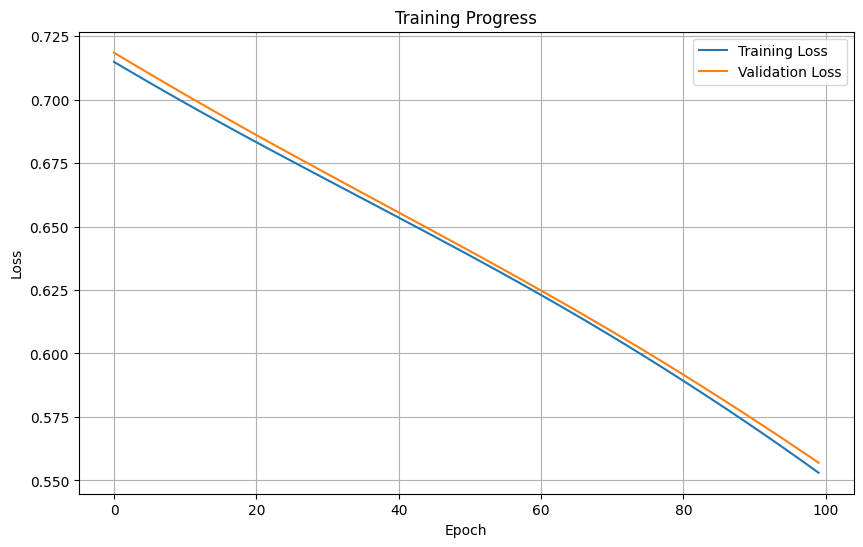

In [261]:
# Plot training progress
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Progress')
plt.legend()
plt.grid(True)
plt.show()

### 6.3 Model Evaluation

In [262]:
# Evaluate the model
model.eval()
with torch.no_grad():
    # Training accuracy
    train_outputs = model(X_train)
    train_predictions = torch.argmax(train_outputs, dim=1)
    train_accuracy = (train_predictions == y_train).float().mean()
    
    # Validation accuracy
    val_outputs = model(X_val)
    val_predictions = torch.argmax(val_outputs, dim=1)
    val_accuracy = (val_predictions == y_val).float().mean()

print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Validation Accuracy: {val_accuracy:.4f} ({val_accuracy*100:.2f}%)")

Training Accuracy: 0.7212 (72.12%)
Validation Accuracy: 0.7000 (70.00%)


## 7. Complete Example: Iris Dataset Classification

Let's put everything together with a real dataset - the famous Iris dataset.

In [263]:
# Load and prepare the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Feature names: {iris.feature_names}")
print(f"Class names: {iris.target_names}")
print()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_train_tensor = torch.LongTensor(y_train)
y_test_tensor = torch.LongTensor(y_test)

print(f"Training set size: {X_train_tensor.shape[0]}")
print(f"Test set size: {X_test_tensor.shape[0]}")

Dataset shape: (150, 4)
Number of classes: 3
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Class names: ['setosa' 'versicolor' 'virginica']

Training set size: 120
Test set size: 30


In [264]:
# Define the neural network for Iris classification
class IrisNet(nn.Module):
    def __init__(self):
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(4, 16)  # 4 input features
        self.fc2 = nn.Linear(16, 8)
        #self.fc4 = nn.Linear(8, 8)
        self.fc3 = nn.Linear(8, 3)   # 3 output classes
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        # x = self.dropout(x)
        # x = self.relu(self.fc4(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Create the model
iris_model = IrisNet()
print("Iris Classification Model:")
print(iris_model)
print()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(iris_model.parameters(), lr=0.01)

print(f"Total parameters: {sum(p.numel() for p in iris_model.parameters())}")

Iris Classification Model:
IrisNet(
  (fc1): Linear(in_features=4, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=3, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
)

Total parameters: 243


In [265]:
# Training the Iris model
num_epochs = 200
train_losses = []
train_accuracies = []

iris_model.train()
for epoch in range(num_epochs):
    # Forward pass
    outputs = iris_model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Calculate accuracy
    with torch.no_grad():
        predicted = torch.argmax(outputs, dim=1)
        accuracy = (predicted == y_train_tensor).float().mean()
    
    train_losses.append(loss.item())
    train_accuracies.append(accuracy.item())
    
    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy.item():.4f}')

print("\nTraining completed!")

Epoch [50/200], Loss: 0.2718, Accuracy: 0.8917
Epoch [100/200], Loss: 0.1099, Accuracy: 0.9417
Epoch [150/200], Loss: 0.1209, Accuracy: 0.9500
Epoch [200/200], Loss: 0.1326, Accuracy: 0.9500

Training completed!


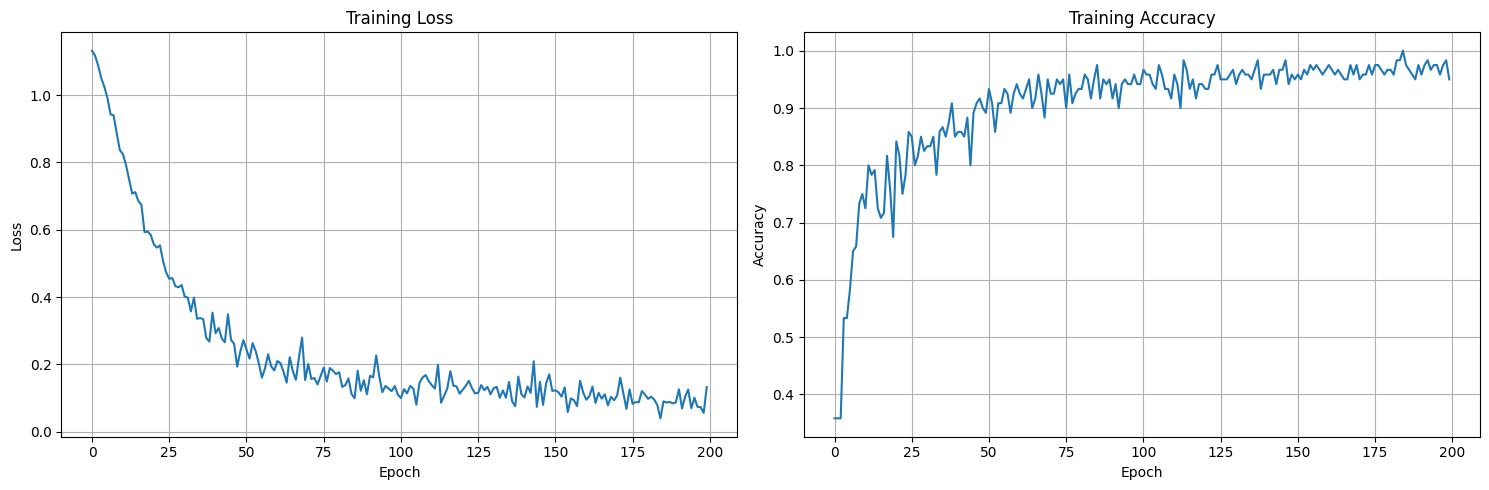

In [266]:
# Plot training progress
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot loss
ax1.plot(train_losses)
ax1.set_title('Training Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.grid(True)

# Plot accuracy
ax2.plot(train_accuracies)
ax2.set_title('Training Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.grid(True)

plt.tight_layout()
plt.show()

In [267]:
# Evaluate on test set
iris_model.eval()
with torch.no_grad():
    test_outputs = iris_model(X_test_tensor)
    test_predictions = torch.argmax(test_outputs, dim=1)
    test_accuracy = (test_predictions == y_test_tensor).float().mean()
    
    # Get probabilities using softmax
    test_probabilities = torch.softmax(test_outputs, dim=1)

print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print()

# Show some predictions
print("Sample predictions:")
print("Actual -> Predicted (Probabilities)")
for i in range(min(10, len(y_test))):
    actual = iris.target_names[y_test[i]]
    predicted = iris.target_names[test_predictions[i]]
    probs = test_probabilities[i].numpy()
    print(f"{actual:10} -> {predicted:10} {probs}")

Test Accuracy: 1.0000 (100.00%)

Sample predictions:
Actual -> Predicted (Probabilities)
versicolor -> versicolor [0.00142331 0.99493587 0.00364087]
setosa     -> setosa     [1.0000000e+00 3.7942122e-08 6.5456936e-22]
virginica  -> virginica  [2.9247365e-11 3.5627672e-04 9.9964368e-01]
versicolor -> versicolor [0.00179383 0.98841083 0.00979534]
versicolor -> versicolor [7.1231084e-04 9.9455535e-01 4.7323667e-03]
setosa     -> setosa     [9.9999964e-01 3.0569106e-07 1.0706331e-19]
versicolor -> versicolor [3.9569605e-03 9.9573368e-01 3.0934752e-04]
virginica  -> virginica  [1.31103582e-06 1.26928855e-02 9.87305760e-01]
versicolor -> versicolor [1.8375863e-04 8.8737255e-01 1.1244364e-01]
versicolor -> versicolor [1.8232819e-03 9.9775404e-01 4.2271055e-04]


In [268]:
# Make predictions on new data
def predict_iris_class(model, scaler, features):
    """
    Predict iris class for given features
    features: [sepal_length, sepal_width, petal_length, petal_width]
    """
    model.eval()
    with torch.no_grad():
        # Normalize features
        features_scaled = scaler.transform([features])
        features_tensor = torch.FloatTensor(features_scaled)
        
        # Make prediction
        output = model(features_tensor)
        probabilities = torch.softmax(output, dim=1)
        predicted_class = torch.argmax(output, dim=1)
        
        return predicted_class.item(), probabilities.numpy()[0]

# Example predictions
examples = [
    [5.1, 3.5, 1.4, 0.2],  # Typical setosa
    [6.2, 2.8, 4.8, 1.8],  # Typical versicolor
    [7.2, 3.0, 5.8, 1.6],  # Typical virginica
]

print("Predictions for new samples:")
print("Features [SL, SW, PL, PW] -> Prediction (Probabilities)")
for features in examples:
    pred_class, probs = predict_iris_class(iris_model, scaler, features)
    class_name = iris.target_names[pred_class]
    print(f"{features} -> {class_name} {probs}")

Predictions for new samples:
Features [SL, SW, PL, PW] -> Prediction (Probabilities)
[5.1, 3.5, 1.4, 0.2] -> setosa [1.0000000e+00 1.1445520e-08 2.1152396e-23]
[6.2, 2.8, 4.8, 1.8] -> virginica [8.6423992e-05 1.0039041e-01 8.9952320e-01]
[7.2, 3.0, 5.8, 1.6] -> virginica [3.1469372e-05 5.9135985e-02 9.4083256e-01]


## 8. Best Practices and Next Steps

### Key Takeaways:

1. **Tensors are fundamental** - They're like NumPy arrays but with GPU support and automatic differentiation

2. **Autograd is powerful** - PyTorch automatically computes gradients for you

3. **nn.Module is the base** - Always inherit from this when building models

4. **Training loop structure**:
   - Forward pass
   - Compute loss
   - Zero gradients
   - Backward pass
   - Update parameters

5. **Don't forget to**:
   - Set model to train/eval mode
   - Use `torch.no_grad()` for inference
   - Normalize your data
   - Monitor training progress

### Common Debugging Tips:

- Check tensor shapes frequently
- Ensure data types match (float32 for inputs, long for classification labels)
- Watch out for in-place operations when computing gradients
- Use `model.train()` and `model.eval()` appropriately
- Don't forget to zero gradients before backward pass

### Next Steps to Learn:

1. **Data Loading**: `torch.utils.data.DataLoader` for efficient batch processing
2. **Convolutional Networks**: For computer vision tasks
3. **Recurrent Networks**: For sequence data
4. **Transfer Learning**: Using pre-trained models
5. **GPU Computing**: Moving tensors and models to GPU
6. **Saving/Loading Models**: Model persistence

### Useful Resources:

- [PyTorch Documentation](https://pytorch.org/docs/stable/index.html)
- [PyTorch Tutorials](https://pytorch.org/tutorials/)
- [PyTorch Examples](https://github.com/pytorch/examples)
- [Deep Learning with PyTorch](https://pytorch.org/deep-learning-with-pytorch)

## 🎯 Exercise for You!

Try modifying the Iris classification example:

1. Change the network architecture (add more layers, change sizes)
2. Try different activation functions (Tanh, LeakyReLU)
3. Experiment with different optimizers and learning rates
4. Add regularization techniques (different dropout rates)
5. Create visualizations of the decision boundaries

Happy learning with PyTorch! 🚀